## 載入套件及檔案

In [30]:
!pip install seaborn

  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [297]:
!pip install mlxtend

  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)


In [1]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
pd.set_option('display.max_rows', 800)

In [343]:
df = pd.read_csv('add_simple.csv')

In [344]:
df.head(500)

,id,simplejudge,years,court,record,place,compromise,xword,education,mind,financial,support,attitude,confess,sequel,law,label
0,1013,非簡易\n,90,市區,['nan'],['實體'],['nan'],['人格侮辱'],['nan'],['nan'],['nan'],['nan'],['nan'],['否'],['nan'],['公然侮辱_1'],2000
1,1022,非簡易\n,90,市區,['nan'],['實體'],['nan'],敘述侮辱,['nan'],['nan'],['nan'],['nan'],['良好'],['是'],['nan'],['誹謗_2'],90000
2,1025,非簡易\n,90,市區,['nan'],['nan'],['nan'],動物侮辱,['nan'],['nan'],['nan'],['nan'],['nan'],['否'],['nan'],['公然侮辱_1'],1000
3,1031,非簡易\n,91,市區,['無'],['網路'],['nan'],['nan'],['nan'],['nan'],['nan'],['nan'],['nan'],['是'],['nan'],['誹謗_2'],20000
4,1032,非簡易\n,91,市區,['nan'],['實體'],['有'],人格侮辱,['nan'],['nan'],['nan'],['nan'],['尚可'],['否'],['nan'],['公然侮辱_1'],20000
5,1035,簡易判決\n,90,市區,['nan'],['網路'],['nan'],['nan'],['大專院校以上'],['nan'],['nan'],['nan'],['尚可'],['是'],['nan'],['誹謗_2'],40000
6,1036,非簡易\n,91,市區,['無'],['實體'],['nan'],['nan'],['nan'],['nan'],['nan'],['nan'],['不佳'],['nan'],['nan'],['誹謗_1'],20000
7,1041,非簡易\n,91,市區,['nan'],['實體'],['nan'],敘述侮辱,['nan'],['nan'],['nan'],['nan'],['不佳'],['否'],['nan'],['公然侮辱_1'],50000
8,1043,非簡易\n,91,市區,['nan'],['實體'],['nan'],動物侮辱,['nan'],['nan'],['nan'],['nan'],['不佳'],['否'],['是'],['公然侮辱_1'],1000
9,1050,非簡易\n,91,市區,['nan'],['實體'],['nan'],幹,['nan'],['nan'],['nan'],['nan'],['nan'],['是'],['是'],['公然侮辱_1'],1000


## 資料清理

In [45]:
type(df['xword'][5])

str

In [345]:
for i in range(len(df)):
    for j in range(0,17):
        df.iloc[i,j] = str(df.iloc[i,j]).replace("[", '').replace("]","").replace("'","").replace(" ","").replace('\n','')

In [346]:
for i in range(len(df)):
    df.iloc[i,15] = str(df.iloc[i,15]).replace("公然侮辱_1", '309_1').replace("公然侮辱_2","309_2").replace("誹謗_1","310_1").replace("誹謗_2","310_2")

In [347]:
df[['years', 'label']]=df[['years', 'label']].astype(int)

In [348]:
for i in range(len(df)):
    for j in range(0,17):
        if df.iloc[i,j] == 'nan':
            df.iloc[i,j] = None

## 特徵工程

In [349]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10924 non-null  object
 1   simplejudge  10924 non-null  object
 2   years        10924 non-null  int32 
 3   court        10923 non-null  object
 4   record       2688 non-null   object
 5   place        7461 non-null   object
 6   compromise   4509 non-null   object
 7   xword        8774 non-null   object
 8   education    4408 non-null   object
 9   mind         151 non-null    object
 10  financial    2145 non-null   object
 11  support      815 non-null    object
 12  attitude     6141 non-null   object
 13  confess      9069 non-null   object
 14  sequel       3390 non-null   object
 15  law          10924 non-null  object
 16  label        10924 non-null  int32 
dtypes: int32(2), object(15)
memory usage: 1.3+ MB


In [53]:
df['simplejudge'].value_counts()

簡易判決    7668
非簡易     3256
Name: simplejudge, dtype: int64

In [174]:
df['court'].value_counts()

市區      8647
郊區      2124
高等法院     152
Name: court, dtype: int64

In [358]:
df.groupby(['law'])['label'].value_counts()

law    label 
309_1  5000      954
       3000      825
       20000     753
       10000     572
       6000      485
       30000     458
       2000      369
       8000      295
       4000      289
       15000     248
       40000     164
       1000      131
       50000     129
       25000      91
       7000       83
       9000       79
       35000      33
       1500       23
       55000      23
       45000      20
       59000      20
       12000      12
       120000      9
       60000       8
       90000       8
       500         7
       300         6
       150000      4
       600         3
       1200        3
       58000       3
       100         2
       900         2
       2100        2
       3500        2
       70000       2
       4           1
       200         1
       2500        1
       4500        1
       6600        1
       7500        1
       13000       1
       14000       1
       16000       1
       18000       1
       65000       1

In [175]:
df.groupby(['law'])['xword'].value_counts()

law    xword
309_1  幹        1098
       泛詞侮辱     1076
       人格侮辱      829
       形容侮辱      704
       幹你X       606
       動物侮辱      485
       精神侮辱      371
       蕩婦侮辱      366
       器官侮辱      214
       動作侮辱      164
       敘述侮辱      160
       詛咒侮辱       49
       面相侮辱        9
309_2  動作侮辱       21
       幹           7
       泛詞侮辱        6
       人格侮辱        5
       形容侮辱        5
       動物侮辱        4
       敘述侮辱        3
       蕩婦侮辱        3
       器官侮辱        2
       幹你X         2
       精神侮辱        2
310_1  泛詞侮辱      377
       人格侮辱      316
       形容侮辱      124
       幹         101
       敘述侮辱       84
       動物侮辱       78
       蕩婦侮辱       78
       精神侮辱       29
       器官侮辱       16
       動作侮辱        9
       幹你X         7
       詛咒侮辱        2
       面相侮辱        2
310_2  泛詞侮辱      416
       人格侮辱      366
       幹         129
       形容侮辱      122
       敘述侮辱       88
       蕩婦侮辱       88
       動物侮辱       76
       精神侮辱       27
       動作侮辱       20
       器官侮辱       19


In [176]:
df.groupby(['law'])['simplejudge'].value_counts()

law    simplejudge
309_1  簡易判決           5678
       非簡易            1814
309_2  簡易判決             65
       非簡易              16
310_1  非簡易             831
       簡易判決            691
310_2  簡易判決           1234
       非簡易             595
Name: simplejudge, dtype: int64

In [129]:
df.groupby(['law','simplejudge'])['label'].describe().applymap(lambda x: int(x))

count   mean    std   min    25%    50%    75%     max
law   simplejudge                                                        
309_1 簡易判決          5678  11000  11666     4   3500   6000  15000  150000
      非簡易           1814  16932  16990   100   5000  10000  20000  180000
309_2 簡易判決            65  26969  20852  1000  15000  20000  30000  120000
      非簡易             16  35312  28276  1000  17500  32500  51250   90000
310_1 簡易判決           691  30534  25622   300  10000  30000  40000  210000
      非簡易            831  44844  42096     1  20000  35000  50000  365000
310_2 簡易判決          1234  34968  27656   500  20000  30000  45000  300000
      非簡易            595  51687  42185   300  30000  40000  59000  300000

In [119]:
df.groupby(['law'])['label'].describe().applymap(lambda x: int(x))

,count,mean,std,min,25%,50%,75%,max
law,,,,,,,,
309_1,7492,12436,13396,4,4000,6000,20000,180000
309_2,81,28617,22559,1000,15000,20000,40000,120000
310_1,1522,38347,36272,1,20000,30000,50000,365000
310_2,1829,40407,33994,300,20000,30000,50000,300000


In [2]:
pd.crosstab(df['label'],df['law']).T.style.background_gradient(cmap='summer_r')

NameError: name 'df' is not defined

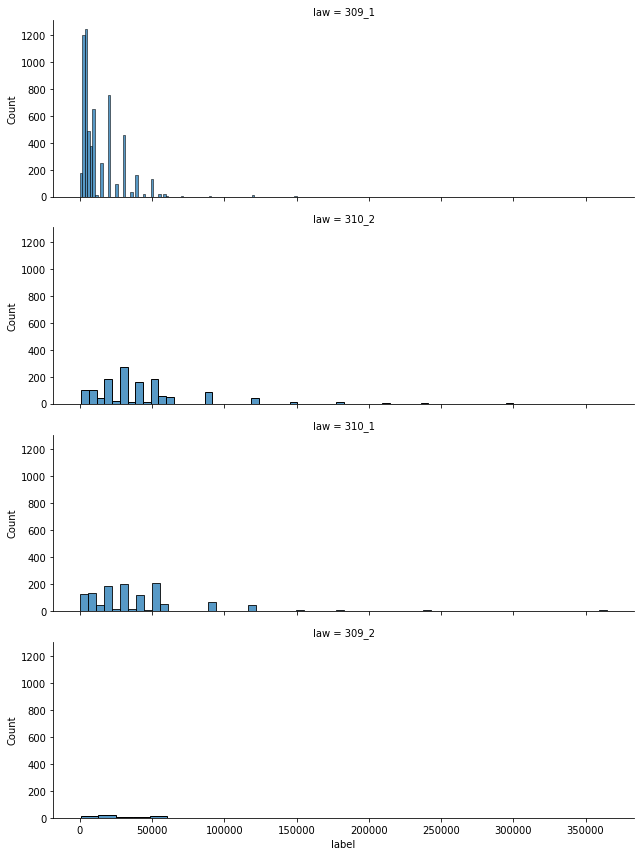

In [360]:
g = sns.FacetGrid(df, col='law', col_wrap=1, aspect=3)
g.map(sns.histplot,'label',kde=False)

<AxesSubplot:xlabel='label', ylabel='Count'>

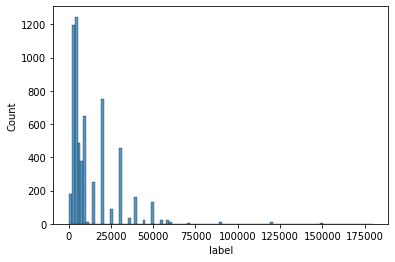

In [361]:
mask = df['law']=='309_1'
pos = np.flatnonzero(mask)
df309_1 = df.iloc[pos]
# g = sns.FacetGrid(df309_1, col='simplejudge', col_wrap=1, aspect=3)
# g.map(sns.histplot,'label',kde=False)
sns.histplot(df309_1['label'],kde=False)

<AxesSubplot:xlabel='label', ylabel='Count'>

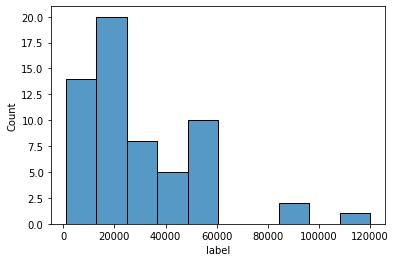

In [362]:
mask = df['law']=='309_2'
pos = np.flatnonzero(mask)
df309_2 = df.iloc[pos]
# g = sns.FacetGrid(df309_2, col='simplejudge', col_wrap=1, aspect=3)
# g.map(sns.histplot,'label',kde=False)
sns.histplot(df309_2['label'],kde=False)

<AxesSubplot:xlabel='label', ylabel='Count'>

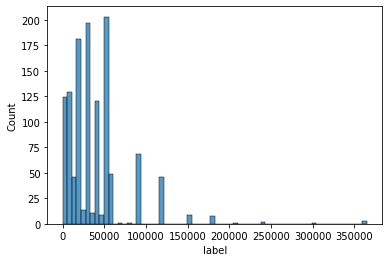

In [363]:
mask = df['law']=='310_1'
pos = np.flatnonzero(mask)
df310_1 = df.iloc[pos]
# g = sns.FacetGrid(df310_1, col='simplejudge', col_wrap=1, aspect=3)
# g.map(sns.histplot,'label',kde=False)
sns.histplot(df310_1['label'],kde=False)

<AxesSubplot:xlabel='label', ylabel='Count'>

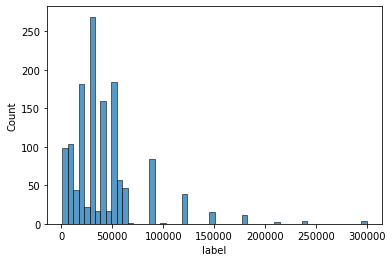

In [364]:
mask = df['law']=='310_2'
pos = np.flatnonzero(mask)
df310_2 = df.iloc[pos]
# g = sns.FacetGrid(df310_2, col='simplejudge', col_wrap=1, aspect=3)
# g.map(sns.histplot,'label',kde=False)
sns.histplot(df310_2['label'],kde=False)

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='label', ylabel='count'>

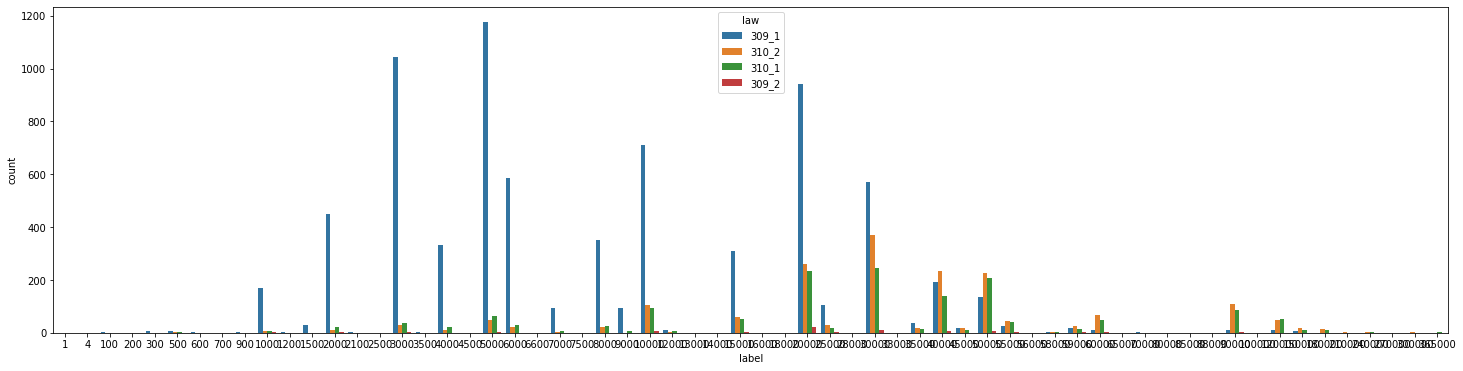

In [91]:
plt.figure(figsize=(25,6))
sns.countplot(df['label'],hue=df['law'])

## 刪補空值

In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10924 entries, 0 to 10923
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           10924 non-null  object
 1   simplejudge  10924 non-null  object
 2   years        10924 non-null  int32 
 3   court        10924 non-null  object
 4   record       2688 non-null   object
 5   place        7461 non-null   object
 6   compromise   4510 non-null   object
 7   xword        8774 non-null   object
 8   education    4408 non-null   object
 9   mind         151 non-null    object
 10  financial    2145 non-null   object
 11  support      815 non-null    object
 12  attitude     6141 non-null   object
 13  confess      9069 non-null   object
 14  sequel       3390 non-null   object
 15  law          10924 non-null  object
 16  label        10924 non-null  int32 
dtypes: int32(2), object(15)
memory usage: 1.3+ MB


In [187]:
mask = (df['court'].isnull())
df[mask]

,id,simplejudge,years,court,record,place,compromise,xword,education,mind,financial,support,attitude,confess,sequel,law,label
4859,22142,簡易判決,107,None,無,網路,無,精神侮辱,None,None,None,None,None,是,是,309_1,5000


In [351]:
df['court'].fillna(value='市區', inplace=True)
df['record'].fillna(value='無', inplace=True)
df['place'].fillna(value='實體', inplace=True)
df['compromise'].fillna(value='無', inplace=True)
# df['xword'].fillna(value='無', inplace=True)
df['education'].fillna(value='高中職', inplace=True)
df['mind'].fillna(value='正常', inplace=True)
df['financial'].fillna(value='正常', inplace=True)
df['support'].fillna(value='無', inplace=True)
df['attitude'].fillna(value='尚可', inplace=True)
df['confess'].fillna(value='否', inplace=True)
df['sequel'].fillna(value='否', inplace=True)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8774 entries, 0 to 10920
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           8774 non-null   object
 1   simplejudge  8774 non-null   object
 2   years        8774 non-null   int32 
 3   court        8774 non-null   object
 4   record       8774 non-null   object
 5   place        8774 non-null   object
 6   compromise   8774 non-null   object
 7   xword        8774 non-null   object
 8   education    8774 non-null   object
 9   mind         8774 non-null   object
 10  financial    8774 non-null   object
 11  support      8774 non-null   object
 12  attitude     8774 non-null   object
 13  confess      8774 non-null   object
 14  sequel       8774 non-null   object
 15  law          8774 non-null   object
 16  label        8774 non-null   int32 
dtypes: int32(2), object(15)
memory usage: 1.1+ MB


In [355]:
df = df.dropna(axis=0, how='any')

## 離群值處理

In [365]:
# 考慮最後應該會以分類模型作為學習，因此不採取log或平方方式
print ("Shape Of The Before Ouliers: ",df309_1.shape)
n=1.5
#IQR = Q3-Q1
IQR = np.percentile(df309_1['label'],75) - np.percentile(df309_1['label'],25)
#outlier = Q3 + n*IQR 
df309_1=df309_1[df309_1['label'] < np.percentile(df309_1['label'],75)+n*IQR]
#outlier = Q1 - n*IQR 
df309_1=df309_1[df309_1['label'] > np.percentile(df309_1['label'],25)-n*IQR]
print ("Shape Of The After Ouliers: ",df309_1.shape)

Shape Of The Before Ouliers:  (6131, 17)
Shape Of The After Ouliers:  (5901, 17)


<AxesSubplot:xlabel='label', ylabel='Count'>

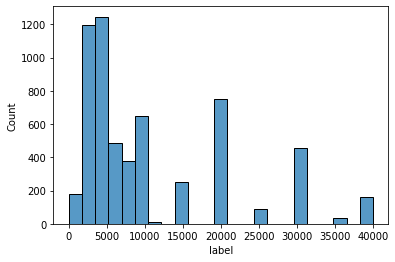

In [366]:
sns.histplot(df309_1['label'],kde=False)

In [371]:
df309_1['label'].value_counts()

5000     954
3000     825
20000    753
10000    572
6000     485
30000    458
2000     369
8000     295
4000     289
15000    248
40000    164
1000     131
25000     91
7000      83
9000      79
35000     33
1500      23
12000     12
500        7
300        6
600        3
1200       3
3500       2
900        2
2100       2
100        2
7500       1
13000      1
4          1
6600       1
2500       1
14000      1
18000      1
4500       1
16000      1
200        1
Name: label, dtype: int64

## 轉碼

In [193]:
from sklearn.preprocessing import LabelEncoder

In [197]:
labelencoder = LabelEncoder() 
df2 = df.copy(deep=True)
df2['simplejudge'] = labelencoder.fit_transform(df2['simplejudge']) 
df2['court'] = labelencoder.fit_transform(df2['court']) 
df2['record'] = labelencoder.fit_transform(df2['record']) 
df2['place'] = labelencoder.fit_transform(df2['place']) 
df2['compromise'] = labelencoder.fit_transform(df2['compromise']) 
df2['xword'] = labelencoder.fit_transform(df2['xword']) 
df2['education'] = labelencoder.fit_transform(df2['education']) 
df2['mind'] = labelencoder.fit_transform(df2['mind']) 
df2['financial'] = labelencoder.fit_transform(df2['financial']) 
df2['support'] = labelencoder.fit_transform(df2['support']) 
df2['attitude'] = labelencoder.fit_transform(df2['attitude']) 
df2['confess'] = labelencoder.fit_transform(df2['confess']) 
df2['law'] = labelencoder.fit_transform(df2['law'])
df2['sequel'] = labelencoder.fit_transform(df2['sequel']) 

In [203]:
df2.head(500)

,id,simplejudge,years,court,record,place,compromise,xword,education,mind,financial,support,attitude,confess,sequel,law,label
0,1013,1,90,0,1,0,0,0,2,2,2,1,1,0,0,0,2000
1,1022,1,90,0,1,0,2,7,2,2,2,1,2,1,0,3,90000
2,1025,1,90,0,1,0,2,2,2,2,2,1,1,0,0,0,1000
3,1031,1,91,0,1,1,2,9,2,2,2,1,1,1,0,3,20000
4,1032,1,91,0,1,0,1,0,2,2,2,1,1,0,0,0,20000
5,1035,0,90,0,1,1,2,9,1,2,2,1,1,1,0,3,40000
6,1036,1,91,0,1,0,2,9,2,2,2,1,0,0,0,2,20000
7,1041,1,91,0,1,0,2,7,2,2,2,1,0,0,0,0,50000
8,1043,1,91,0,1,0,2,2,2,2,2,1,0,0,1,0,1000
9,1050,1,91,0,1,0,2,4,2,2,2,1,1,1,1,0,1000


## 切分資料集

In [199]:
# 全資料
X = df2.drop(['label','id','years'],axis=1)
y = df2['label']

In [367]:
# 309-1
law = df2.groupby('law')
df_insult1 = law.get_group(0)
# df_insult1 = df_insult1.sample(200)
X1 = df_insult1.drop(['label','id','years','law'],axis=1)
y1 = df_insult1['label']

In [248]:
# 309-2
law = df2.groupby('law')
df_insult2 = law.get_group(1)
X2 = df_insult2.drop(['label','id','years','law'],axis=1)
y2 = df_insult2['label']

In [302]:
# 310-1
law = df2.groupby('law')
df_insult3 = law.get_group(2)
# df_insult3 = df_insult3.sample(200)
X3 = df_insult3.drop(['label','id','years','law'],axis=1)
y3 = df_insult3['label']

In [303]:
# 310-2
law = df2.groupby('law')
df_insult4 = law.get_group(3)
# df_insult4 = df_insult4.sample(200)
X4 = df_insult4.drop(['label','id','years','law'],axis=1)
y4 = df_insult4['label']

## Dimension Reduction (MDS、PCA、Isomap)

In [231]:
from sklearn import preprocessing

In [331]:
X_test=X1
y_test=y1

In [339]:
scaler = preprocessing.StandardScaler().fit(X_test)
X_test = scaler.transform(X_test)

Text(0.5, 1.0, 'Using sklearn MDS')

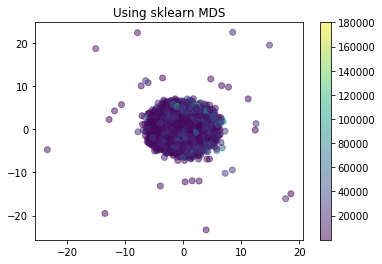

In [340]:
from sklearn.manifold import MDS
mds=MDS(n_components=2) 
mds.fit(X_test)
X_mds=mds.fit_transform(X_test)
plt.scatter(X_mds[:,0],X_mds[:,1],c=y_test,alpha=.5)
plt.colorbar()
plt.title('Using sklearn MDS')

Text(0.5, 1.0, 'Using sklearn PCA')

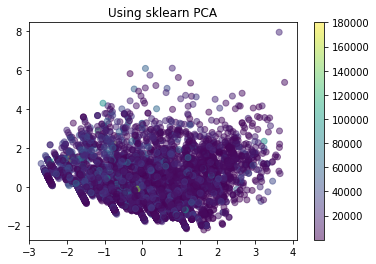

In [341]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca.fit(X_test)
X_PCA=pca.fit_transform(X_test)
plt.scatter(X_PCA[:,0],X_PCA[:,1],c=y_test,alpha=.5)
plt.colorbar ()
plt.title('Using sklearn PCA')

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\sklearn\manifold\_isomap.py:302: UserWarning: The number of connected components of the neighbors graph is 111 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col,

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-packages\scipy\sparse\_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
C:\Users\Student\anaconda3\envs\ML\lib\site-pack

Text(0.5, 1.0, 'Using sklearn Isomap')

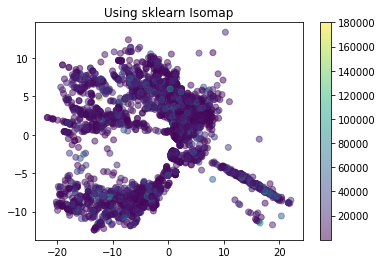

In [342]:
from sklearn.manifold import Isomap
iso=Isomap(n_components=2)
iso.fit(X_test)
X_iso=iso.transform(X_test)
plt.scatter(X_iso[:,0],X_iso[:,1],c=y_test,alpha=.5)
plt.colorbar()
plt.title('Using sklearn Isomap')

## Stepwise Regression

In [377]:
from sklearn.feature_selection import RFE
from sklearn import datasets, linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn import neighbors
# estimator =  neighbors.KNeighborsClassifier(algorithm = 'brute', n_neighbors = 3, weights = 'distance', p = 1)
estimator = RandomForestClassifier(max_depth=6, n_estimators=10)
# estimator = linear_model.LinearRegression()
selector = RFE(estimator, n_features_to_select=1, step=1)
selector = selector.fit(X_test, y_test)
print(selector.support_)
print(selector.ranking_)
for i in selector.ranking_:
    i = i-1
    print(X1.columns[i])

[False False False False False  True False False False False False False
 False]
[ 6  5  9 10 11  1  3 13  4 12  2  7  8]
xword
compromise
financial
support
attitude
simplejudge
record
sequel
place
confess
court
education
mind
